In [1]:
import pandas as pd
import numpy as np


In [2]:
def get_unique_values(column_name):
    """Returns the unique values in a specified column of the DataFrame."""
    return df[column_name].unique()

def get_value_counts( column_name):
    """Returns the value counts in a specified column of the DataFrame."""
    return df[column_name].value_counts()


In [3]:
df = pd.read_csv('../Datasets/original_data.csv')

In [4]:
df.head()

,User_ID,Session_ID,Course_ID,Device_Type,Access_Time,Duration (sec),Clickstream,Prev_Courses_Completed,Feedback_Text,Course_Description,Resource_Type,Performance_Score,Engagement_Level,Recommendation_Label
0,U1000,S2000,C001,desktop,2025-05-24 12:54:01,1250,74,3,Detailed explanation and examples,Introduction to Machine Learning,video,83,0.46,1
1,U1001,S2001,C005,mobile,2025-06-05 09:21:13,395,26,0,Needs better visuals,Basics of Web Development,video,56,0.05,0
2,U1002,S2002,C005,desktop,2025-05-27 10:17:23,1718,94,4,Informative and well-paced,Basics of Web Development,quiz,87,0.81,1
3,U1003,S2003,C003,desktop,2025-05-29 04:19:25,1163,87,4,Good pace but some examples missing,Data Structures in Python,video,88,0.51,1
4,U1004,S2004,C003,desktop,2025-06-07 21:57:36,399,31,1,Too basic for my level,Data Structures in Python,video,59,0.06,0


In [5]:
df.corr()

ValueError: could not convert string to float: 'U1000'

In [ ]:
df.describe()

,Duration (sec),Clickstream,Prev_Courses_Completed,Performance_Score,Engagement_Level,Recommendation_Label
count,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000
mean,1086.072627,62.128183,2.629051,75.290509,0.380177,0.606481
std,443.691102,24.626626,1.847942,19.525814,0.243219,0.488601
min,300.000000,20.000000,0.000000,40.000000,0.030000,0.000000
25%,680.500000,39.000000,1.000000,56.000000,0.110000,0.000000
50%,1136.500000,67.000000,3.000000,83.000000,0.440000,1.000000
75%,1480.000000,84.000000,4.000000,92.000000,0.580000,1.000000
max,1800.000000,100.000000,5.000000,100.000000,0.890000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 3456 non-null   object 
 1   Session_ID              3456 non-null   object 
 2   Course_ID               3456 non-null   object 
 3   Device_Type             3456 non-null   object 
 4   Access_Time             3456 non-null   object 
 5   Duration (sec)          3456 non-null   int64  
 6   Clickstream             3456 non-null   int64  
 7   Prev_Courses_Completed  3456 non-null   int64  
 8   Feedback_Text           3456 non-null   object 
 9   Course_Description      3456 non-null   object 
 10  Resource_Type           3456 non-null   object 
 11  Performance_Score       3456 non-null   int64  
 12  Engagement_Level        3456 non-null   float64
 13  Recommendation_Label    3456 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memor

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd



dataset = df 
X = dataset.drop(columns=['Recommendation_Label'])
y = dataset['Recommendation_Label']

X_encoded = pd.get_dummies(X, drop_first=True)


sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_encoded, y)

print("Before SMOTE:", y.value_counts(normalize=True))
print("After SMOTE:", y_res.value_counts(normalize=True))

dataset_balanced = pd.concat([pd.DataFrame(X_res, columns=X_encoded.columns),
                              y_res.rename('Recommendation_Label')], axis=1)


Before SMOTE: Recommendation_Label
1    0.606481
0    0.393519
Name: proportion, dtype: float64
After SMOTE: Recommendation_Label
1    0.5
0    0.5
Name: proportion, dtype: float64


In [8]:
df.shape

(3456, 14)

Finding categorical features

In [9]:
possible_categorical_features = ["Course_ID", "Device_Type","Course_Description","Resource_Type","Engagement_Level","Recommendation_Label","Prev_Courses_Completed"]

In [10]:
for i in possible_categorical_features:
    print(f"Unique values in {i}: {get_unique_values(i)}")

Unique values in Course_ID: ['C001' 'C005' 'C003' 'C004' 'C002']
Unique values in Device_Type: ['desktop' 'mobile' 'tablet']
Unique values in Course_Description: ['Introduction to Machine Learning' 'Basics of Web Development'
 'Data Structures in Python' 'Linear Regression Explained'
 'Deep Learning Basics']
Unique values in Resource_Type: ['video' 'quiz' 'document']
Unique values in Engagement_Level: [0.46 0.05 0.81 0.51 0.06 0.08 0.39 0.48 0.53 0.64 0.07 0.12 0.14 0.2
 0.45 0.58 0.42 0.04 0.35 0.55 0.61 0.49 0.59 0.76 0.11 0.09 0.52 0.57
 0.13 0.63 0.4  0.84 0.1  0.47 0.5  0.8  0.72 0.66 0.17 0.15 0.43 0.65
 0.67 0.77 0.56 0.37 0.69 0.19 0.41 0.79 0.44 0.73 0.71 0.36 0.32 0.68
 0.86 0.7  0.75 0.33 0.62 0.88 0.89 0.16 0.54 0.38 0.87 0.82 0.74 0.18
 0.34 0.83 0.85 0.78 0.6  0.03 0.31 0.21 0.3  0.22]
Unique values in Recommendation_Label: [1 0]
Unique values in Prev_Courses_Completed: [3 0 4 1 5]


Direct categorical features
1. Course id
2. device_type
3. Prev_Course_completed
4. Course Description -> redundant to course id
5. Resource Type
6. Recommendation level -> target

***Drop useless columns

In [11]:
drop_cols = ['User_ID', 'Session_ID', 'Feedback_Text', 'Course_Description']
df = df.drop(columns=drop_cols)


In [12]:
df.drop(columns=['Course_ID'])

,Device_Type,Access_Time,Duration (sec),Clickstream,Prev_Courses_Completed,Resource_Type,Performance_Score,Engagement_Level,Recommendation_Label
0,desktop,2025-05-24 12:54:01,1250,74,3,video,83,0.46,1
1,mobile,2025-06-05 09:21:13,395,26,0,video,56,0.05,0
2,desktop,2025-05-27 10:17:23,1718,94,4,quiz,87,0.81,1
3,desktop,2025-05-29 04:19:25,1163,87,4,video,88,0.51,1
4,desktop,2025-06-07 21:57:36,399,31,1,video,59,0.06,0
...,...,...,...,...,...,...,...,...,...
3451,desktop,2025-05-29 23:27:48,1379,79,4,video,83,0.54,1
3452,mobile,2025-06-14 03:01:41,1007,94,5,quiz,95,0.47,1
3453,tablet,2025-06-15 08:41:53,1229,95,5,document,85,0.58,1
3454,mobile,2025-06-12 16:44:23,1773,67,3,video,96,0.59,1


In [14]:
df.columns

Index(['Course_ID', 'Device_Type', 'Access_Time', 'Duration (sec)',
       'Clickstream', 'Prev_Courses_Completed', 'Resource_Type',
       'Performance_Score', 'Engagement_Level', 'Recommendation_Label'],
      dtype='object')

In [18]:
corr_matrix=df.corr(numeric_only=True)

In [16]:
import seaborn as sns

<Axes: >

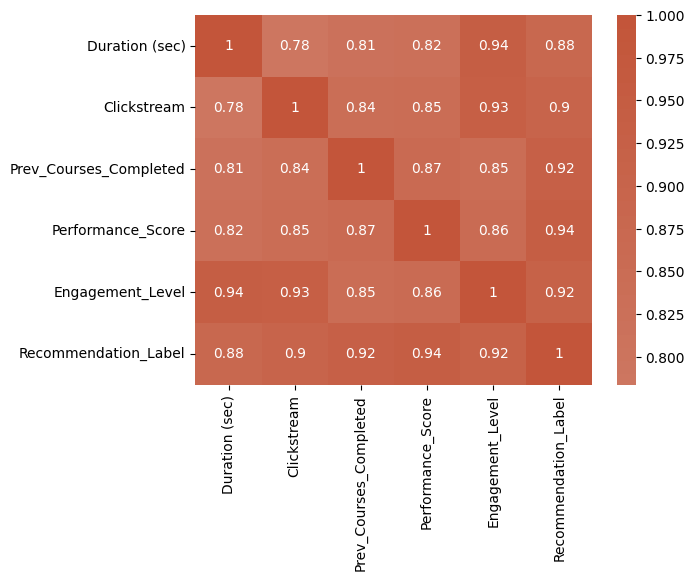

In [22]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0)

In [ ]:
df.columns

Index(['Course_ID', 'Device_Type', 'Access_Time', 'Duration (sec)',
       'Clickstream', 'Prev_Courses_Completed', 'Resource_Type',
       'Performance_Score', 'Engagement_Level', 'Recommendation_Label'],
      dtype='object')

In [19]:
df["Interaction_Rate"] = df["Clickstream"] / (df["Duration (sec)"] + 1e-5)

In [ ]:


epsilon = 1e-3
df["Learning_Efficiency"] = np.log1p(df["Performance_Score"] /100) / (df["Engagement_Level"] + epsilon)


In [21]:
df['Access_Time'].value_counts()

Access_Time
2025-05-18 00:39:16    2
2025-05-29 14:17:40    2
2025-05-26 13:24:42    1
2025-05-24 12:54:01    1
2025-06-05 09:21:13    1
                      ..
2025-05-27 07:58:09    1
2025-05-23 13:27:19    1
2025-06-07 12:19:27    1
2025-05-21 05:25:21    1
2025-05-29 04:54:23    1
Name: count, Length: 3454, dtype: int64

In [22]:
df.describe()

,Duration (sec),Clickstream,Prev_Courses_Completed,Performance_Score,Engagement_Level,Recommendation_Label,Interaction_Rate,Learning_Efficiency
count,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000
mean,1086.072627,62.128183,2.629051,75.290509,0.380177,0.606481,0.060526,2.582582
std,443.691102,24.626626,1.847942,19.525814,0.243219,0.488601,0.019782,2.186066
min,300.000000,20.000000,0.000000,40.000000,0.030000,0.000000,0.022422,0.678245
25%,680.500000,39.000000,1.000000,56.000000,0.110000,0.000000,0.046807,1.106653
50%,1136.500000,67.000000,3.000000,83.000000,0.440000,1.000000,0.057001,1.455451
75%,1480.000000,84.000000,4.000000,92.000000,0.580000,1.000000,0.070760,3.568450
max,1800.000000,100.000000,5.000000,100.000000,0.890000,1.000000,0.160772,15.562134


In [23]:
df.drop(columns=['Performance_Score', 'Engagement_Level', 'Duration (sec)', 'Clickstream'], inplace=True)

In [24]:
df.columns

Index(['Course_ID', 'Device_Type', 'Access_Time', 'Prev_Courses_Completed',
       'Resource_Type', 'Recommendation_Label', 'Interaction_Rate',
       'Learning_Efficiency'],
      dtype='object')

In [25]:
df["Access_Time"] = pd.to_datetime(df["Access_Time"])

# Extract useful features
df["Hour"] = df["Access_Time"].dt.hour
df["DayOfWeek"] = df["Access_Time"].dt.day_name()


In [26]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["TimeOfDay"] = df["Hour"].apply(time_of_day)


In [27]:
df = df.drop(columns=["Access_Time", "Hour"])


In [ ]:
binned_columns = [
    "Learning_Efficiency",
    "Interaction_Rate",
    "Prev_Courses_Completed"
    

]


for col in binned_columns:
    try:
        
        _, bins = pd.qcut(df[col], q=3, retbins=True, duplicates='drop')
        print(f"\n📊 {col} Bin Boundaries:")
        for i in range(len(bins)-1):
            print(f"  Bin {i+1}: {bins[i]:.2f}  →  {bins[i+1]:.2f}")
    except Exception as e:
        print(f"\n⚠️ Could not process {col}: {e}")


📊 Learning_Efficiency Bin Boundaries:
  Bin 1: 0.68  →  1.20
  Bin 2: 1.20  →  2.77
  Bin 3: 2.77  →  15.56

📊 Interaction_Rate Bin Boundaries:
  Bin 1: 0.02  →  0.05
  Bin 2: 0.05  →  0.07
  Bin 3: 0.07  →  0.16

📊 Prev_Courses_Completed Bin Boundaries:
  Bin 1: 0.00  →  1.00
  Bin 2: 1.00  →  4.00
  Bin 3: 4.00  →  5.00


In [30]:
df['Prev_Courses_Category'] = pd.qcut(df['Prev_Courses_Completed'], q=3, labels=['few', 'moderate', 'many'])

In [31]:
df['Learning_Efficiency_Category'] = pd.qcut(df['Learning_Efficiency'], q=3, labels=['low', 'medium', 'high'])

In [32]:
df['Interaction_Rate_Category'] = pd.qcut(df['Interaction_Rate'], q=3, labels=['low', 'medium', 'high'])

In [34]:
df["Recommendation_Label"] = df["Recommendation_Label"].map({1: "Recommended", 0: "Not_Recommended"})

In [36]:
df.drop(columns=['Prev_Courses_Completed'], inplace=True)

In [37]:
df.drop(columns=['Learning_Efficiency'], inplace=True)

In [90]:
df.head()

,Course_ID,Device_Type,Resource_Type,Recommendation_Label,Interaction_Rate,DayOfWeek,TimeOfDay,Prev_Courses_Category,Learning_Efficiency_Category,Interaction_Rate_Category
0,C001,desktop,video,Recommended,0.059200,Saturday,Afternoon,moderate,medium,medium
1,C005,mobile,video,Not_Recommended,0.065823,Thursday,Morning,few,high,high
2,C005,desktop,quiz,Recommended,0.054715,Tuesday,Morning,moderate,low,medium
3,C003,desktop,video,Recommended,0.074807,Thursday,Night,moderate,medium,high
4,C003,desktop,video,Not_Recommended,0.077694,Saturday,Night,few,high,high


In [38]:
df.columns

Index(['Course_ID', 'Device_Type', 'Resource_Type', 'Recommendation_Label',
       'Interaction_Rate', 'DayOfWeek', 'TimeOfDay', 'Prev_Courses_Category',
       'Learning_Efficiency_Category', 'Interaction_Rate_Category'],
      dtype='object')

In [39]:
df.drop(columns=['Interaction_Rate'], inplace=True)

In [40]:
df.to_csv('balanced_data.csv', index=False)